
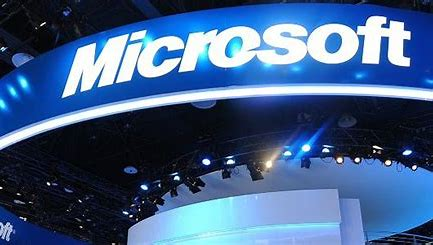

Microsoft Movie Studio Analysis

Project Overview

This project is about Microsoft Movie Analysis on their new movie studio. This will help and give insigtsto the best and trending movies that microsoft should leverage in, in the already versatile and dynamic industry.
The project explores different datasets containing information about movies to determine the best films at the box office currently.


Objectives

1.Analyse the new and and top movies that microsoft should venture in to be able to perform well in the industry as a new entrant

2.Compare different genres and the perfomance rating to be able to advise Microsoft on the best movie genres in the market.

3.Increase market presence where microsoft will be able to offer many solutions in one including entertainment to its customer as well as make profits, and this will be obtained by analysing box office grossings of various movies.



Data Loading and Inspection

Data Understanding

The dataset used for this anaysis was downloaded from different box offices. The data was was acquired from;
https://www.boxofficemojo.com/
https://www.imdb.com/
https://www.themoviedb.org/


Data dictionary about movies:

1.tconst/movie_id: Primary identifier for all movies
2.primary_title: This is the original movie title the movie was given
3.start_year: This is the year the movie started production
4.runtime_minutes: This is the count of minutes in each movie
5.genres: This is the the classification of the movie
6.averagerating: This is the rating collected over the continent from viewers
7.numvotes: This is the number of people who voted the movies and their count was used to generate ratings
8.title: Title the movie was produced with
9.studio: This is the studio in which each movie was produced
10.domestic_gross: This is the amount of money collected from each sell of movies in the country of origin
11.foreign_gross: This is the amount of money collected from each sell of movies in the country of origin
12.year: This is the year the movie was produced

In [1]:
# Loading the imports
import pandas as pd
import numpy as np
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
a = r"C:\Users\ISABEL\Desktop\DSF_PT6\Phase_1\Project\zippedData\bom.movie_gross.csv.gz"
bom_movie_gross = pd.read_csv(a)
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#check te data information such as type and missing values
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


There are missing values on foreign_gross, domestic_gross and studio

In [4]:
b = r"C:\Users\ISABEL\Desktop\DSF_PT6\Phase_1\Project\zippedData\imdb.title.basics.csv.gz"
imdb_title_basics = pd.read_csv(b)
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Only runtime_minutes original_title and genres have nmissing values

In [6]:
c = r"C:\Users\ISABEL\Desktop\DSF_PT6\Phase_1\Project\zippedData\imdb.title.ratings.csv.gz"
imdb_title_ratings = pd.read_csv(c)
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This data set has no missing values

In [8]:
#First i will merge the 3 data set to obtain one data set to work with

merged_df = pd.merge(imdb_title_basics, imdb_title_ratings, on = "tconst", how='outer')
merged_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [9]:
#changing the pimary title to title so that we have one common base
merged_df.rename(columns={'primary_title': 'title'}, inplace=True)

In [10]:
final_merged_df = pd.merge(merged_df, bom_movie_gross, on = "title", how='outer')
final_merged_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN


In [11]:
final_merged_df.tail()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
146922,NaN,Hannah (2018),NaN,NaN,NaN,NaN,NaN,NaN,PDF,11700.0,NaN,2018.0
146923,NaN,Furious (Legend of Kolovrat),NaN,NaN,NaN,NaN,NaN,NaN,CARUSEL,10000.0,NaN,2018.0
146924,NaN,Edward II (2018 re-release),NaN,NaN,NaN,NaN,NaN,NaN,FM,4800.0,NaN,2018.0
146925,NaN,El Pacto,NaN,NaN,NaN,NaN,NaN,NaN,Sony,2500.0,NaN,2018.0
146926,NaN,The Swan,NaN,NaN,NaN,NaN,NaN,NaN,Synergetic,2400.0,NaN,2018.0


In [12]:
# Checking the final merged data frame for more information
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146927 entries, 0 to 146926
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146146 non-null  object 
 1   title            146927 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  float64
 4   runtime_minutes  114407 non-null  float64
 5   genres           140738 non-null  object 
 6   averagerating    73858 non-null   float64
 7   numvotes         73858 non-null   float64
 8   studio           4142 non-null    object 
 9   domestic_gross   4112 non-null    float64
 10  foreign_gross    2516 non-null    object 
 11  year             4147 non-null    float64
dtypes: float64(6), object(6)
memory usage: 14.6+ MB


There seems to be alot of missing values from the data frame but dropping the columns at this point is not an
option because those columns are necessary for our movie analysis
Hence, i will have to drop the null value in rows
The %ge of missing values on averagerating, numvotes, studio, domestic_gross,foreign_gross and year columns are very necessary and cannot be dropped

In [13]:
# Checking the percentage of missing values
final_merged_df.isna().mean()

tconst             0.005316
title              0.000000
original_title     0.005458
start_year         0.005316
runtime_minutes    0.221334
genres             0.042123
averagerating      0.497315
numvotes           0.497315
studio             0.971809
domestic_gross     0.972013
foreign_gross      0.982876
year               0.971775
dtype: float64

In [14]:
# Dropping all missing values 
final_merged_df.dropna(inplace=True) 
final_merged_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
58,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000,2012.0
61,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,IFC,744000.0,8000000,2012.0
63,tt5647250,On the Road,On the Road,2016.0,121.0,Drama,5.7,127.0,IFC,744000.0,8000000,2012.0
70,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000,2013.0
74,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000,2014.0


In [15]:
# Checking the final merged data frame for more information
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 58 to 141254
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1767 non-null   object 
 1   title            1767 non-null   object 
 2   original_title   1767 non-null   object 
 3   start_year       1767 non-null   float64
 4   runtime_minutes  1767 non-null   float64
 5   genres           1767 non-null   object 
 6   averagerating    1767 non-null   float64
 7   numvotes         1767 non-null   float64
 8   studio           1767 non-null   object 
 9   domestic_gross   1767 non-null   float64
 10  foreign_gross    1767 non-null   object 
 11  year             1767 non-null   float64
dtypes: float64(6), object(6)
memory usage: 179.5+ KB


In [16]:
# there are no missing values 
final_merged_df.isna().sum()

tconst             0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [17]:
# Changing name from tconst to movie_id
final_merged_df.rename(columns={'tconst': 'movie_id'}, inplace=True)
#Dropping original_title and start_year because there are other similar columns
final_merged_df.drop(columns = ["original_title","start_year"],inplace=True)
final_merged_df.head()

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
58,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000,2012.0
61,tt4339118,On the Road,89.0,Drama,6.0,6.0,IFC,744000.0,8000000,2012.0
63,tt5647250,On the Road,121.0,Drama,5.7,127.0,IFC,744000.0,8000000,2012.0
70,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000,2013.0
74,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000,2014.0


In [18]:
# Convert the two colums from float to intergers
final_merged_df['numvotes'] = final_merged_df['numvotes'].astype(int)
final_merged_df['year'] = final_merged_df['year'].astype(int)

In [19]:
final_merged_df['foreign_gross'].fillna(0, inplace=True)
final_merged_df['domestic_gross'].fillna(0, inplace=True)
final_merged_df['foreign_gross'] = pd.to_numeric(final_merged_df['foreign_gross'], errors='coerce').fillna(0)

In [20]:
# Convert the two colums to one common column = total_gross column
final_merged_df['total_gross'] = (final_merged_df['domestic_gross'] + final_merged_df['foreign_gross'])

In [21]:
#Dropping domestic_gross and foreign_gross because i have created total_gross column
final_merged_df.drop(columns = ["domestic_gross","foreign_gross"],inplace=True)

In [22]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 58 to 141254
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1767 non-null   object 
 1   title            1767 non-null   object 
 2   runtime_minutes  1767 non-null   float64
 3   genres           1767 non-null   object 
 4   averagerating    1767 non-null   float64
 5   numvotes         1767 non-null   int32  
 6   studio           1767 non-null   object 
 7   year             1767 non-null   int32  
 8   total_gross      1767 non-null   float64
dtypes: float64(3), int32(2), object(4)
memory usage: 124.2+ KB


In [23]:
# Changing the name of the data frame to df
df = final_merged_df
df.head()

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,studio,year,total_gross
58,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,2012,8744000.0
61,tt4339118,On the Road,89.0,Drama,6.0,6,IFC,2012,8744000.0
63,tt5647250,On the Road,121.0,Drama,5.7,127,IFC,2012,8744000.0
70,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,2013,188100000.0
74,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,2014,53200000.0


Outliers

In [24]:
# This shows that average rating ranges 0-10 so cant have outliers
df["averagerating"].unique()


array([6.1, 6. , 5.7, 7.3, 6.5, 7. , 6.6, 6.2, 5.1, 7.8, 5.9, 6.8, 7.1,
       8.3, 7.4, 7.5, 4.2, 6.9, 7.9, 7.2, 6.4, 6.3, 5.4, 7.7, 5.5, 4.3,
       8.1, 1.7, 3.8, 4.5, 5.8, 8. , 5.6, 3.5, 5. , 2.6, 3.3, 7.6, 8.6,
       4.8, 6.7, 5.3, 4.1, 8.2, 9.2, 5.2, 2.1, 8.7, 8.4, 4.7, 4.9, 4.6,
       3.9, 4.4, 8.5, 4. , 3.4, 8.8, 3.7, 3. , 2.5, 1.6, 2.9, 3.6, 3.2])

<function matplotlib.pyplot.show(close=None, block=None)>

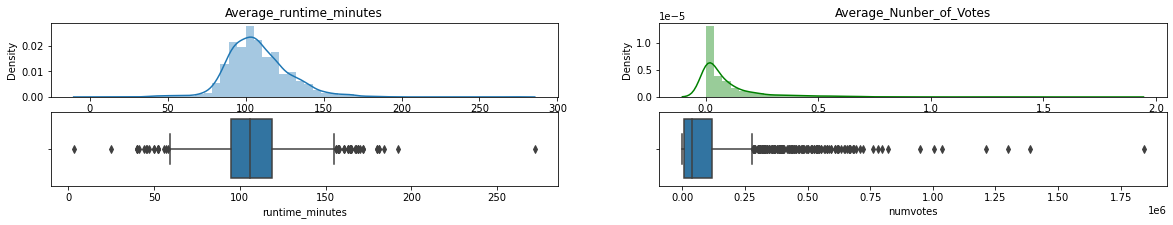

In [25]:
#Plotting subplot of runtime_minutes and numvotes to visualize outliers

plt.figure(figsize = (20, 3))
plt.subplot(2,2,1)
sns.distplot(df['runtime_minutes'])
plt.title('Average_runtime_minutes')
plt.subplot(2,2,2)
sns.distplot(df['numvotes'], color= "green")
plt.title('Average_Nunber_of_Votes')
plt.subplot(2,2,3)
sns.boxplot(df['runtime_minutes'],orient= "h")
plt.subplot(2,2,4)
sns.boxplot(df['numvotes'],orient= "h")
#plt.title('Average_runtime_minutes')
plt.show

In [26]:
df[df['runtime_minutes']>300].count()

movie_id           0
title              0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
year               0
total_gross        0
dtype: int64

In [27]:
df[df['runtime_minutes']<60].count()

movie_id           20
title              20
runtime_minutes    20
genres             20
averagerating      20
numvotes           20
studio             20
year               20
total_gross        20
dtype: int64

The longest movie in existence is around 317 minutes roughly 5hrs. source(https://www.imdb.com/list/ls059554016/) and the shortest is around 68 minutes source(https://www.imdb.com/list/ls071822246/) 

On enquiring for outliers below 60 minutes, I found only 20 of them. But i will not drop them because they are also considered
as short movies or shorts

Exploratory Data Analysis(EDA)

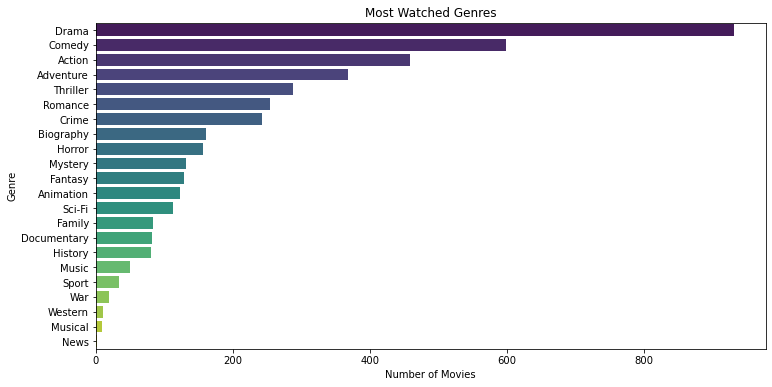

In [28]:
# Plotting a bar graph of the most watched genres

plt.figure(figsize=(12, 6))
# Plotting the graph
genre_counts = df['genres'].str.split(',').explode().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Most Watched Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

The most popular genre is Drama in terms of number of occurrence as it appears in over 800 movies, followed closely by Comedy and Action while western,musical and News record the poorest occurence. 

Text(0.5, 1.0, 'Studio Against Box Office')

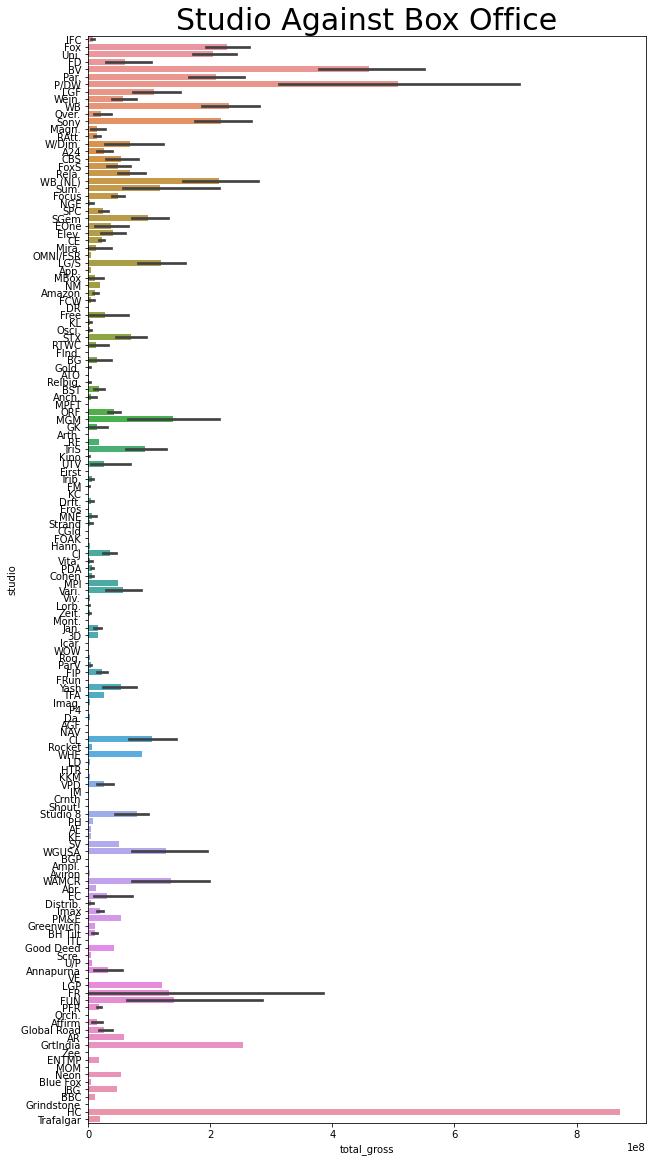

In [37]:
#Plotting a bar graph of the Studio vs Box office earnings

# Selecting a size for the figure
ax,fig=plt.subplots(figsize=(10,20),facecolor='w', edgecolor='k')

# Plotting the graph

plot=sns.barplot(data=df,y=df['studio'],x=df['total_gross'],orient='h')
plt.title("Studio Against Box Office",fontsize=30)

In [30]:
# Group by 'genres' and calculate mean for 'numvotes' and 'total_gross'
genre_stats = df.groupby('studio').agg({'total_gross': 'mean' , 'averagerating' : 'mean'}).reset_index()

# Sort by 'numvotes', averagerating and 'total_gross' in descending order
top_five_averagerating = genre_stats.sort_values(by='averagerating', ascending=False).head(5)
top_five_total_gross = genre_stats.sort_values(by='total_gross', ascending=False).head(5)

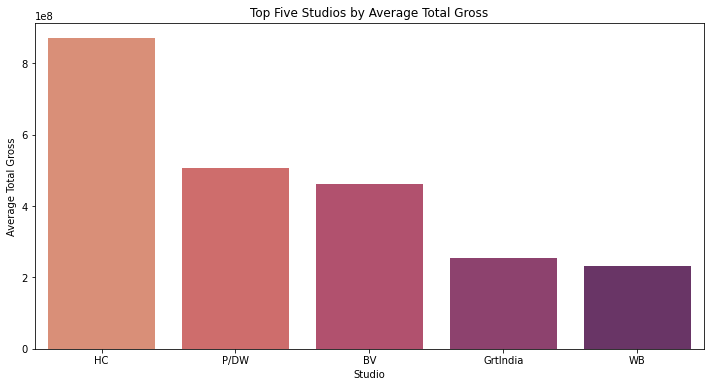

In [31]:
#Plotting a bar graph of Top Five Studios by Average Total Gross

plt.figure(figsize=(12, 6))
# Plotting the graph
sns.barplot(x='studio', y='total_gross', data=top_five_total_gross, palette='flare')
plt.title('Top Five Studios by Average Total Gross')
plt.xlabel('Studio')
plt.ylabel('Average Total Gross')
plt.show()

From the above graphs, Highly grossing studio was HC

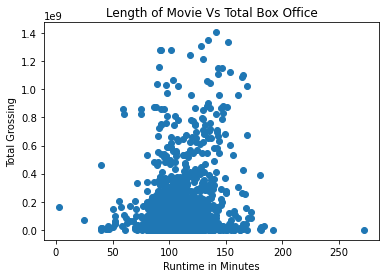

In [32]:
#Plotting a scatter plot of Length of Movie Vs Total Box Office

plt.scatter('runtime_minutes', 'total_gross', data=df)

# Add labels and title
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Grossing')
plt.title('Length of Movie Vs Total Box Office')

# Show the plot
plt.show()

In [33]:
df["runtime_minutes"].describe()

count    1767.000000
mean      107.895869
std        20.105904
min         3.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       272.000000
Name: runtime_minutes, dtype: float64

The graph above shows that most highly grossing movies are of the average time between 100 to 150 minutes of which the 
mean running_minuted fall in between there

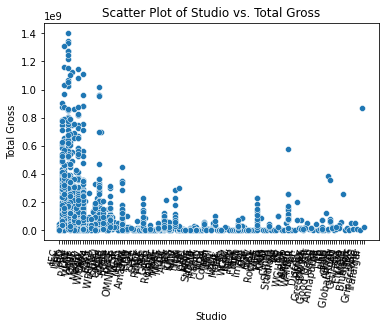

In [34]:
#Plotting a scatter plot of  Studio vs. Total Gross
sns.scatterplot(x='studio', y='total_gross', data=df, palette='flare')

# Add labels and title
plt.xticks(rotation=80, ha='right')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Studio vs. Total Gross')

# Show the plot
plt.show()

In [40]:
# Group by 'genres' and calculate mean for 'numvotes' and 'total_gross'
genre_stats = df.groupby('genres').agg({'total_gross': 'mean' , 'averagerating' : 'mean'}).reset_index()

# Sort by 'numvotes', averagerating and 'total_gross' in descending order
top_five_averagerating = genre_stats.sort_values(by='averagerating', ascending=False).head(5)
top_five_total_gross = genre_stats.sort_values(by='total_gross', ascending=False).head(5)

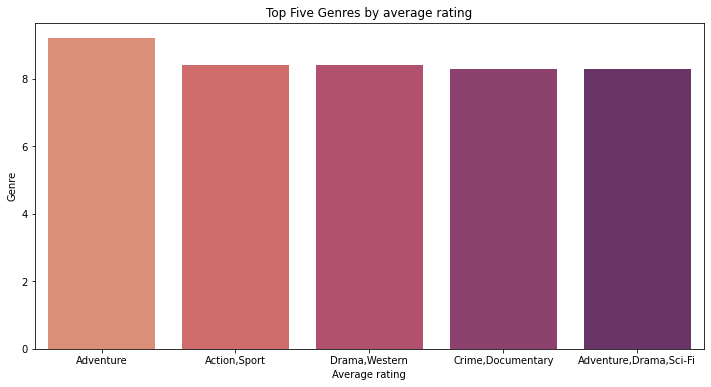

In [41]:
#Plotting a bar graph of Top Five Genres by average rating

plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top_five_averagerating, palette='flare')
plt.title('Top Five Genres by average rating')
plt.xlabel('Average rating')
plt.ylabel('Genre')
plt.show()

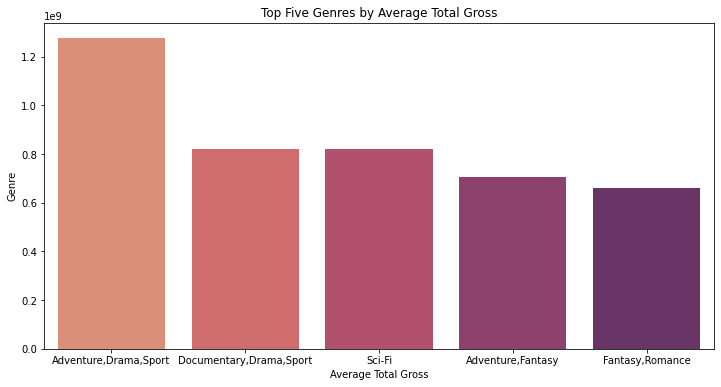

In [39]:
#Plotting a bar graph of Top Five Genres by Average Total Gross

plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='total_gross', data=top_five_total_gross, palette='flare')
plt.title('Top Five Genres by Average Total Gross')
plt.xlabel('Average Total Gross')
plt.ylabel('Genre')
plt.show()

Conclusions and Recommendations

Microsoft company should invest in Drama most of all. it is coming in first in both most watched genres and grossing meaning the profitability from the Drama genre will be major.For a second option they should cosider Adventure movies as they did well in average rating

Microsoft company should consider coming up with movies that run between 90 to 150 minutes, Because they are the highly grossing

Lastly, Microsoft company should consider collaborating or buying a hint of marketting ideas from HC movie studio who are performing well in the industry